In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from loadTDMS import *
from tqdm import tqdm

In [122]:
date = 20221027
num = 4
# path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
c_d = load_tdms(path, ch_num=3)

In [123]:
%matplotlib qt
plt.figure()
plt.plot(c_d[1])

In [124]:
len(c_d[0])

5242457

In [23]:
a = np.array(c_d[1])
np.average(a)

0.7961518

### Non-Cuttingの平均電圧調べ

In [2]:
def get_average(num, non_cutting_avg):
    date = 20221027
    path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Non-Cutting\Dynamo_{num}.tdms"
    c_d = load_tdms(path, ch_num=3)
    a = np.array(c_d[1])
    non_cutting_avg.append(np.average(a))

In [3]:
non_cutting_avg = []
for i in tqdm(range(1,170)):
    get_average(i, non_cutting_avg)

100%|██████████| 169/169 [00:32<00:00,  5.14it/s]


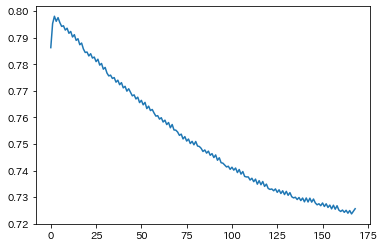

In [4]:
plt.plot(non_cutting_avg)

In [18]:
# dict1 = dict(voltage = non_cutting_avg[:])
df = pd.DataFrame(non_cutting_avg, columns=["voltage_avg"])
df.index = df.index + 1
df.to_csv(rf'Z:\200 Produced_data\20221027\CF\non-cuting-volatage-avg.csv')

In [3]:
a = pd.read_csv(rf'Z:\200 Produced_data\20221027\CF\non-cuting-volatage-avg.csv')

In [4]:
a['voltage_avg'].describe()

count    169.000000
mean       0.752490
std        0.022281
min        0.723667
25%        0.732379
50%        0.747739
75%        0.770774
max        0.798063
Name: voltage_avg, dtype: float64

In [5]:
%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(xlim=(1,169))
ax.set_xlabel(xlabel='Path Number', size=20, labelpad=20)
ax.set_ylabel(ylabel='Average Voltage[V]', size=20, labelpad=20)
ax.tick_params(axis = 'x', labelsize =18)
ax.tick_params(axis = 'y', labelsize =18)
plt.plot(range(1,170),a['voltage_avg'], linewidth = 3)

### ドリフト考慮なし

In [ ]:
def get_max10_min10_avg(num):
    date = 20221027
    path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
    c_d = load_tdms(path, ch_num=3)
    
    a = np.array(c_d[1][:4930000])
    
    
    cutting_max.append(sorted(a)[-10:])
    cutting_min.append(sorted(a)[:10])
    cutting_avg.append(np.average(a))

### ドリフト考慮あり

In [18]:
myList = [200,40,-1000,-30,555555,1]

# hehe = sorted(enumerate(myList))
# hehe
list(map(list, sorted(enumerate(myList), key=lambda x: x[1])))[:3]


[[2, -1000], [3, -30], [5, 1]]

In [59]:
a = [3,100,23]
#小さい順（昇順）
print(np.argsort(a))
#大きい順（降順）
print(np.argsort(a[::-1]))

#小さい順で３つ、そのインデクスを取得
b = [200,40,-1000,-30,555555,1]
print(np.argsort(b)[:3])

[0 2 1]
[2 0 1]
[2 3 5]


In [18]:
def get_max10_min10_avg(num):
    date = 20221027
    path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
    nc_path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Non-Cutting\Dynamo_{num}.tdms"
    c_d = load_tdms(path, ch_num=3)
    nc_d = load_tdms(nc_path, ch_num=3)
    
    cd = np.array(c_d[1][:4930000])
    ncd = np.array(c_d[1][:4930000])

    cutting_min_v = list(map(list, sorted(enumerate(cd), key=lambda x: x[1])))[:100]    
    cutting_min_v.sort()
    
    c_min_v = np.array(cutting_min_v).T
#     c_min_v[0] = c_min_v[0] / len(cd) * 0.049 + (num-1) * 0.049

    c_min_cf = np.array(cutting_min_v).T
    c_min_cf[0] = c_min_cf[0] / len(cd) * 0.049 + (num-1) * 0.049
    c_min_cf[1] = c_min_cf[1] -np.average(ncd) * (-500)
    
    
    
    return c_min_v, c_min_cf

In [23]:
c_min_v, c_min_cf = get_max10_min10_avg(1)
dict1 = dict(d = c_min_cf[0], v = c_min_v[1], cf = c_min_cf[1])
df1 = pd.DataFrame(data=dict1)


for i in tqdm(range(2,170)):
    c_min_v, c_min_cf = get_max10_min10_avg(i)
    dict1 = dict(d = c_min_cf[0], v = c_min_v[1], cf = c_min_cf[1])
    df2 = pd.DataFrame(data=dict1)
    df1 = pd.concat([df1,df2], ignore_index=True)

df1.index = df1.index + 1
df1.to_csv(rf'Z:\200 Produced_data\20221027\CF\cf_100points_in_1path.csv')

100%|██████████| 168/168 [39:00<00:00, 13.93s/it]


In [143]:
df1 = pd.DataFrame(data=dict1)


df1.to_csv(fr'\\DAISY05\users\park\200 実験データ加工\20220630\切削抵抗/cuttingForce_allData_{num}_2.csv')

{'d': array([0.16547419, 0.1654742 , 0.16547421, 0.16547422, 0.16547423,
        0.16547424, 0.16547425, 0.16547426, 0.16547427, 0.16547428,
        0.16547429, 0.1654743 , 0.16547431, 0.16547432, 0.16547433,
        0.16547434, 0.16547435, 0.16547436, 0.16547437, 0.16547438,
        0.16547439, 0.1654744 , 0.16547441, 0.16547442, 0.16547443,
        0.16547444, 0.16547445, 0.16547446, 0.16547447, 0.16547448,
        0.16547449, 0.1654745 , 0.16547451, 0.16992317, 0.16992318,
        0.16992319, 0.16992322, 0.16992323, 0.16992324, 0.16992325,
        0.16992326, 0.16992327, 0.16992328, 0.16992329, 0.1699233 ,
        0.16992331, 0.16992332, 0.16992333, 0.16992334, 0.16992335,
        0.16992336, 0.16992337, 0.16992338, 0.16992339, 0.1699234 ,
        0.16992341, 0.16992342, 0.16992343, 0.16992344, 0.16992345,
        0.16992346, 0.16992347, 0.16992348, 0.16992349, 0.1699235 ,
        0.16992351, 0.16992352, 0.16992353, 0.16992354, 0.16992355,
        0.16992356, 0.16992357, 0.16992358,

In [2]:
aa = pd.read_csv(rf'Z:\200 Produced_data\20221027\CF\cf_100points_in_1path.csv')

In [27]:
aa

,Unnamed: 0,d,v,cf
0,1,0.035131,-0.049709,286.408127
1,2,0.035131,-0.049709,286.408127
2,3,0.035131,-0.049709,286.408127
3,4,0.035131,-0.049709,286.408127
4,5,0.035131,-0.049709,286.408127
...,...,...,...,...
16895,16896,8.242650,-0.175867,341.711518
16896,16897,8.242650,-0.174250,341.713135
16897,16898,8.242650,-0.171986,341.715399
16898,16899,8.242650,-0.170368,341.717016


In [3]:
v_d = aa['v'].tolist()
d_d = aa['d'].tolist()
cf_d = v_d * (-500)

## 切削抵抗の推移とその移動平均100

In [34]:
%matplotlib qt
fig = plt.figure()

ax = fig.add_subplot()
ax.tick_params(axis = 'x', labelsize =18)
ax.tick_params(axis = 'y', labelsize =18)
ax.set_xlabel(xlabel='Cutting Distance[m]', size=20, labelpad=20)
ax.set_ylabel(ylabel='Average Voltage[V]', size=20, labelpad=20)


plt.plot(aa['d'],aa['v']*-500, linewidth=3)

a = aa['v']*-500
w_size = 100
v = np.ones(w_size) / w_size
out = np.convolve(a, v, mode='same')

# plt.plot(aa['d'],out, linewidth=4, color='r',label=rf"moving_avg{w_size}",  linestyle="dotted")
# plt.legend(bbox_to_anchor=(0, 1), loc='upper left', fontsize=18)
# plt.tight_layout()


## ドリフト考慮あり　切削抵抗のみ 
#### 半回転の最大値 1pathに592回転=1184半回転
以下のコードは半回転ごとにしたら、増減が激しかったので、1回転ごとにした

In [13]:
def get_min_drift(num):
    date = 20221027
    path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
    nc_path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Non-Cutting\Dynamo_{num}.tdms"
    c_d = load_tdms(path, ch_num=3)
    nc_d = load_tdms(nc_path, ch_num=3)
    
    # 最後のpath以外
    cd = np.array(c_d[1][:4930000])
    ncd = np.array(c_d[1][:4930000])
    
    # 最後のpath
    cd = np.array(c_d[1][:1000000])
    ncd = np.array(c_d[1][:1000000])    
    

    cf = ( cd - np.average(ncd) ) * (-500)
    
    cf_max = []
#     for dot in range(0,1183):
    for dot in range(0,119):
        start = dot*8333
        end = start + 8333
        cf_max.append(np.max(cf[start:end]))

    cf_max = np.array(cf_max)
    
    np.save(rf"Z:\200 Produced_data\20221027\CF\max_1rotation\{num}",cf_max)

In [ ]:
for i in tqdm(range(1,169)):
    get_min_drift(i)


 24%|██▍       | 40/168 [00:38<02:02,  1.04it/s]Exception ignored in: <function tqdm.__del__ at 0x00000297C3E5D790>
Traceback (most recent call last):
  File "C:\Users\pmg07\anaconda3\lib\site-packages\tqdm\std.py", line 1086, in __del__
    self.close()
  File "C:\Users\pmg07\anaconda3\lib\site-packages\tqdm\std.py", line 1293, in close
    self.display(pos=0)
  File "C:\Users\pmg07\anaconda3\lib\site-packages\tqdm\std.py", line 1471, in display
    self.sp(self.__repr__() if msg is None else msg)
  File "C:\Users\pmg07\anaconda3\lib\site-packages\tqdm\std.py", line 1089, in __repr__
    return self.format_meter(**self.format_dict)
  File "C:\Users\pmg07\anaconda3\lib\site-packages\tqdm\std.py", line 423, in format_meter
    bool_prefix_colon_already = (prefix[-2:] == ": ")
TypeError: 'int' object is not subscriptable

100%|██████████| 168/168 [02:43<00:00,  1.04it/s]

In [14]:
get_min_drift(169)

In [15]:
d1 = np.load(rf"Z:\200 Produced_data\20221027\CF\max_1rotation\1.npy")

for num in tqdm(range(2,170)):
    d2 = np.load(rf"Z:\200 Produced_data\20221027\CF\max_1rotation\{num}.npy")
    d1 = np.concatenate([d1, d2], axis=0)

np.save(rf"Z:\200 Produced_data\20221027\CF\max_1rotation\All",d1)

100%|██████████| 168/168 [00:00<00:00, 237.32it/s]


In [16]:
d1.shape

(99407,)

## ドリフト考慮あり　切削抵抗計算やりなおし（1回転&半回転ごとの最大値）
半回転の場合：4166でわる
1回転の場合：8333でわる

In [4]:
def get_min_drift(num):
    date = 20221027
    path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
    nc_path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Non-Cutting\Dynamo_{num}.tdms"
    c_d = load_tdms(path, ch_num=3)
    nc_d = load_tdms(nc_path, ch_num=3)
    
    if num ==169:
        # 最後のpath
        cd = np.array(c_d[1][:1000000])
        ncd = np.array(c_d[1][:1000000])  
    else:
        # 最後のpath以外
        cd = np.array(c_d[1][:4930000])
        ncd = np.array(c_d[1][:4930000])
    
    cf = ( cd - np.average(ncd) ) * (-500)
    cf_max = []
    
    for rot in range(0,int(len(cd)/ 4166)):
        start = rot*4166
        end = start + 4166
        cf_max.append(np.max(cf[start:end]))
    
    cf_max = np.array(cf_max)
    np.save(rf"Z:\200 Produced_data\20221027\CF\recalculate\max_0.5rotation\{num}",cf_max)

In [5]:
for i in tqdm(range(1,170)):
    get_min_drift(i)

  0%|          | 0/169 [00:00<?, ?it/s]Exception ignored in: <generator object tqdm.__iter__ at 0x000001E19A71A9E0>
Traceback (most recent call last):
  File "C:\Users\pmg07\anaconda3\lib\site-packages\tqdm\std.py", line 1130, in __iter__
    yield obj
KeyboardInterrupt: 


FileNotFoundError: [Errno 2] No such file or directory: 'Z:\\100 Raw_data\\20221027---切削実験\\Dynamometer\\Cutting\\Dynamo_1.tdms'

In [101]:
d1 = np.load(rf"Z:\200 Produced_data\20221027\CF\recalculate\max_1rotation\1.npy")

for num in tqdm(range(2,170)):
    d2 = np.load(rf"Z:\200 Produced_data\20221027\CF\recalculate\max_1rotation\{num}.npy")
    d1 = np.concatenate([d1, d2], axis=0)

np.save(rf"Z:\200 Produced_data\20221027\CF\recalculate\max_1rotation\All",d1)

100%|██████████| 168/168 [00:00<00:00, 210.63it/s]


In [102]:
cf_1 = np.load(rf"Z:\200 Produced_data\20221027\CF\recalculate\max_1rotation\1.npy")
cf_169 = np.load(rf"Z:\200 Produced_data\20221027\CF\recalculate\max_1rotation\169.npy")
cf_all = np.load(rf"Z:\200 Produced_data\20221027\CF\recalculate\max_1rotation\All.npy")

print(cf_1.shape)
print(cf_169.shape)
print(cf_all.shape)

(591,)
(120,)
(99408,)


In [98]:
int(1000000/8333)

120

In [90]:
for i in range(0,int(4930000/8333)):
        start = i*8333
        end = start + 8333
print(end)

4924803


## AEspectrum Area & 切削抵抗

In [3]:
cf_all = np.load(rf"Z:\200 Produced_data\20221027\CF\recalculate\max1_rotation\All.npy")
# ae_all = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\All.npy")
# ae_all = ae_all.ravel()[:99408]

In [4]:
print(cf_all.shape)

(99408,)


In [4]:
ae_0_50 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\100kHz\AllNorm_0-50khz_test.npy")
ae_50_100 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\100kHz\AllNorm_50-100khz_test.npy")
ae_100_150 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\100kHz\AllNorm_100-150khz_test.npy")
ae_150_200 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\100kHz\AllNorm_150-200khz_test.npy")
ae_200_250 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\100kHz\AllNorm_200-250khz_test.npy")
ae_250_300 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\100kHz\AllNorm_250-300khz_test.npy")
ae_300_350 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\100kHz\AllNorm_300-350khz_test.npy")
ae_350_400 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\100kHz\AllNorm_350-400khz_test.npy")
ae_400_450 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\100kHz\AllNorm_400-450khz_test.npy")
ae_450_500 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\100kHz\AllNorm_450-500khz_test.npy")

ae_0_50 = ae_0_50.ravel()[:99408]
ae_50_100 = ae_50_100.ravel()[:99408]
ae_100_150 = ae_100_150.ravel()[:99408]
ae_150_200 = ae_150_200.ravel()[:99408]
ae_200_250 = ae_200_250.ravel()[:99408]
ae_250_300 = ae_250_300.ravel()[:99408]
ae_300_350 = ae_300_350.ravel()[:99408]
ae_350_400 = ae_350_400.ravel()[:99408]
ae_400_450 = ae_400_450.ravel()[:99408]
ae_450_500 = ae_450_500.ravel()[:99408]

In [20]:
ae_100_150.shape

(99408,)

In [27]:
ae_100_400 = np.concatenate((ae_100_150, ae_150_200, ae_200_250, ae_250_300, ae_300_350, ae_350_400)).reshape(99408,6)
ae_100_400.shape

(99408, 6)

In [34]:
ae_0_500 = np.concatenate((ae_0_50, ae_50_100, ae_100_150, ae_150_200, ae_200_250, ae_250_300, ae_300_350, ae_350_400, ae_400_450, ae_450_500)).reshape(99408,10)
ae_0_500.shape

(99408, 10)

In [35]:
ae_100_400_a = np.average(ae_100_400, axis=1)
ae_0_500_a = np.average(ae_0_500, axis=1)

## 切削抵抗のみプロット

In [6]:
%matplotlib qt
fig = plt.figure(figsize=(11.69*0.9,8.27*0.9), dpi=100)
ax = fig.add_subplot()
ax.set_xticks(np.arange(1, 169*591, 591*20))
ax.set_xticklabels(np.arange(0,170,20))
ax.set_xlabel(xlabel='Path Number', size=18, labelpad=18)
ax.set_ylabel(ylabel='Cutting Force[N]', size=18, labelpad=18)
ax.tick_params(axis = 'x', labelsize = 18)
ax.tick_params(axis = 'y', labelsize = 18)

w_size = 591*10
x = np.linspace(-1,1,w_size)
v = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
v = v / np.sum(v)
v = np.sort(v)[::-1]

cf_moving_avg = np.convolve(cf_all,v, mode='valid')
ax.plot(cf_moving_avg, lineWidth="5", color="blue", label="Cutting Force")

In [39]:
%matplotlib qt
fig = plt.figure(figsize=(11.69*0.9,8.27*0.9), dpi=100)
ax = fig.add_subplot()
ax.set_xticks(np.arange(1, 169*591, 591*20))
ax.set_xticklabels(np.arange(0,170,20))
ax.set_xlabel(xlabel='Path Number', size=18, labelpad=18)
ax.set_ylabel(ylabel='Cutting Force[N]', size=18, labelpad=18)
ax.tick_params(axis = 'x', labelsize = 18)
ax.tick_params(axis = 'y', labelsize = 18)
ax2 = ax.twinx()
ax2.set_ylabel(ylabel='S (AE spectrum area)', size=18, labelpad=13)


w_size = 591*10
x = np.linspace(-1,1,w_size)
v = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
v = v / np.sum(v)
v = np.sort(v)[::-1]

w2_size = 591*10
x2 = np.linspace(-1,1,w2_size)
v2 = np.exp(-x2**2 / 2) / np.sqrt(2 * np.pi)
v2 = v2 / np.sum(v2)
v2 = np.sort(v2)[::-1]


cf_moving_avg = np.convolve(cf_all,v, mode='valid')
ax.plot(cf_moving_avg, lineWidth="5", color="blue", label="Cutting Force")


# ae_0_50_moving_avg = np.convolve(ae_0_50,v, mode='valid')
# ax2.plot(ae_0_50_moving_avg, lineWidth="3", lineStyle="dashdot", color="magenta", label="S (0-50kHz)")


# ae_50_100_moving_avg = np.convolve(ae_50_100,v, mode='valid')
# ax2.plot(ae_50_100_moving_avg, lineWidth="3", lineStyle="dashdot", color="magenta", label="S (50-100kHz)")


# ae_100_150_moving_avg = np.convolve(ae_100_150,v, mode='valid')
# ax2.plot(ae_100_150_moving_avg, lineWidth="3", lineStyle="dashdot", color="magenta", label="S (100-150kHz)")


# ae_150_200_moving_avg = np.convolve(ae_150_200,v, mode='valid')
# ax2.plot(ae_150_200_moving_avg, lineWidth="3", lineStyle="dashdot", color="magenta", label="S (150-200kHz)")


# ae_200_250_moving_avg = np.convolve(ae_200_250,v, mode='valid')
# ax2.plot(ae_200_250_moving_avg, lineWidth="3", lineStyle="dashdot", color="magenta", label="S (200-250kHz)")


# ae_250_300_moving_avg = np.convolve(ae_250_300,v, mode='valid')
# ax2.plot(ae_250_300_moving_avg, lineWidth="3", lineStyle="dashdot", color="magenta", label="S (250-300kHz)")


# ae_300_350_moving_avg = np.convolve(ae_300_350,v, mode='valid')
# ax2.plot(ae_300_350_moving_avg, lineWidth="3", lineStyle="dashdot", color="magenta", label="S (300-350kHz)")


# ae_350_400_moving_avg = np.convolve(ae_350_400,v, mode='valid')
# ax2.plot(ae_100_150_moving_avg, lineWidth="3", lineStyle="dashdot", color="magenta", label="S (350-400kHz)")


# ae_400_450_moving_avg = np.convolve(ae_400_450,v2, mode='valid')
# ax2.plot(ae_400_450_moving_avg,lineWidth="3", lineStyle="dashdot", color="magenta",label="400-450kHz")


# ae_450_500_moving_avg = np.convolve(ae_450_500,v, mode='valid')
# ax2.plot(ae_450_500_moving_avg,lineWidth="3", lineStyle="dashdot", color="magenta",label="450-500kHz")


# ae_100_400_a_moving_avg = np.convolve(ae_100_400_a,v, mode='valid')
# ax2.plot(ae_100_400_a_moving_avg,lineWidth="3", lineStyle="dashdot", color="magenta",label="100-400kHz")


# ae_0_500_a_moving_avg = np.convolve(ae_0_500_a,v, mode='valid')
# ax2.plot(ae_0_500_a_moving_avg,lineWidth="3", lineStyle="dashdot", color="magenta",label="0-500kHz")

ax2.plot(ae_0_50, lineWidth="3", lineStyle="dashdot", color="magenta", label="S (0-50kHz)")
ax.plot(cf_all, lineWidth="5", color="blue", label="Cutting Force")


In [85]:
#微分
def derivative(func, a, h):
    return (func(a + h) - func(a - h)) / (2 * h)
h = 1e-5

x = np.linspace()

dfunc = derivative(cf_all, x, h)


In [14]:
%matplotlib qt
fig = plt.figure(figsize=(11.69*0.9,8.27*0.9), dpi=100)
# fig = plt.figure()

ax = fig.add_subplot()
ax.set_xticks(np.arange(1, 169*591, 591*20))
ax.set_xticklabels(np.arange(0,170,20))
ax.set_xlabel(xlabel='Path Number', size=18, labelpad=18)
ax.set_ylabel(ylabel='Cutting Force[N]', size=18, labelpad=18)





# ax.spines['left'].set(position=('outward', -10))
# ax.spines['bottom'].set(position=('outward', -10))


ax.tick_params(axis = 'x', labelsize = 18)
ax.tick_params(axis = 'y', labelsize = 18)

ax2 = ax.twinx()
# ax3 = ax.twinx()
# ax4 = ax.twinx()
# ax5 = ax.twinx()
# ax6 = ax.twinx()
# ax7 = ax.twinx()
# ax8 = ax.twinx()
# ax9 = ax.twinx()
# ax10 = ax.twinx()
# ax11 = ax.twinx()



# ax2.tick_params(axis = 'y', labelsize = 18)
# ax3.tick_params(axis = 'y', labelsize = 32)
# ax4.tick_params(axis = 'y', labelsize = 32)
# ax5.tick_params(axis = 'y', labelsize = 32)

ax2.set_ylabel(ylabel='S (AE spectrum area)', size=18, labelpad=13)


# ax3 = ax2.twiny()
# ax4 = ax2.twiny()
# ax5 = ax2.twiny()
# ax6 = ax2.twiny()
# ax7 = ax2.twiny()
# ax8 = ax2.twiny()
# ax9 = ax2.twiny()
# ax10 = ax2.twiny()
# ax11 = ax2.twiny()



# ax3.set_ylabel(ylabel='S (50-100kHz)', size=32, labelpad=13)
# ax4.set_ylabel(ylabel='S (200-250kHz)', size=32, labelpad=13)
# ax5.set_ylabel(ylabel='S (450-500kHz)', size=32, labelpad=13)


# ax2.set_yticks(np.arange(1, 169*591, 591*20))
# ax2.set_yticklabels(np.arange(120,170,20))


w_size = 591*10
x = np.linspace(-1,1,w_size)
v = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
v = v / np.sum(v)
v = np.sort(v)[::-1]

# v = np.ones(w_size) / w_size
# v = [0.125,0.125,0.5,0.125,0.125]
# v2 = np.ones(w2_size) / w2_size

w2_size = 591*10
x2 = np.linspace(-1,1,w2_size)
v2 = np.exp(-x2**2 / 2) / np.sqrt(2 * np.pi)
v2 = v2 / np.sum(v2)
v2 = np.sort(v2)[::-1]


#vを正規分布にする
# x = np.linspace(-1, 1, w_size)  # 区間[-10,10]を100等分する101点
# v = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)



cf_moving_avg = np.convolve(cf_all,v, mode='valid')

# ae_0_50_moving_avg = np.convolve(ae_0_50,v, mode='valid')
ae_50_100_moving_avg = np.convolve(ae_50_100,v, mode='valid')
# ae_100_150_moving_avg = np.convolve(ae_100_150,v, mode='valid')
# ae_150_200_moving_avg = np.convolve(ae_150_200,v, mode='valid')
# ae_200_250_moving_avg = np.convolve(ae_200_250,v, mode='valid')
# ae_250_300_moving_avg = np.convolve(ae_250_300,v, mode='valid')
# ae_300_350_moving_avg = np.convolve(ae_300_350,v, mode='valid')
# ae_350_400_moving_avg = np.convolve(ae_350_400,v, mode='valid')
# ae_400_450_moving_avg = np.convolve(ae_400_450,v, mode='valid')
# ae_400_450_moving_avg = np.convolve(ae_400_450,v2, mode='valid')
# ae_450_500_moving_avg = np.convolve(ae_450_500,v, mode='valid')


# plt.plot(d1, lineWidth="2")
ax.plot(cf_moving_avg, lineWidth="5", color="blue", label="Cutting Force")


# ax2.plot(ae_0_50_moving_avg, lineWidth="5", lineStyle="dashdot", color="g", label="S (0-50kHz)")
# ax2.plot(ae_50_100_moving_avg, color="r", lineStyle="dotted", lineWidth="3.5",label="S (50-100kHz)")
# ax2.plot(ae_200_250_moving_avg, lineWidth="2", color="k", label="S (200-250kHz)")
# ax2.plot(ae_450_500_moving_avg, lineStyle="dashdot",label="S (450-500kHz)")



# ax2.plot(ae_0_50_moving_avg, lineStyle="dashdot",label="0-50kHz")
# ax3.plot(ae_50_100_moving_avg, lineStyle="dashdot",label="50-100kHz")

# ax4.plot(ae_100_150_moving_avg, lineStyle="dashdot",label="100-150kHz")
# ax5.plot(ae_150_200_moving_avg, lineStyle="dashdot",label="150-200kHz")
# ax6.plot(ae_200_250_moving_avg, lineStyle="dashdot",label="200-250kHz")
# ax7.plot(ae_250_300_moving_avg, lineStyle="dashdot",label="250-300kHz")
# ax8.plot(ae_300_350_moving_avg, lineStyle="dashdot",label="300-350kHz")
# ax9.plot(ae_350_400_moving_avg, lineStyle="dashdot",label="350-400kHz")

# ax10.plot(ae_400_450_moving_avg, lineStyle="dashdot",label="400-450kHz")
# ax11.plot(ae_450_500_moving_avg, lineStyle="dashdot",label="450-500kHz")



ax2.plot(ae_0_50_moving_avg, lineWidth="3", lineStyle="dashdot", color="magenta", label="S (0-50kHz)")
# ax2.plot(ae_400_450_moving_avg,lineWidth="3", lineStyle="dashdot", color="magenta",label="400-450kHz")
# ax2.plot(ae_450_500_moving_avg,lineWidth="3", lineStyle="dashdot", color="red",label="450-500kHz")




# plt.tight_layout()

fig.legend(fontsize=26, loc=(0.18,0.75))

In [79]:
w_size = 591*10
x = np.linspace(-1, 1, w_size)  # 区間[-10,10]を100等分する101点
v = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
plt.plot(v)

In [64]:
np.corrcoef(cf_moving_avg, ae_moving_avg)

array([[1.        , 0.27603558],
       [0.27603558, 1.        ]])

In [67]:
cf_moving_avg

(93498,)

In [62]:
%matplotlib qt
fig = plt.figure()

ax = fig.add_subplot()
ax.set_xticks(np.arange(1, 169*591, 591*10))
ax.set_xticklabels(np.arange(0,170,10))

ax.tick_params(axis = 'x', labelsize = 18)
ax.tick_params(axis = 'y', labelsize = 18)

ax.set_xlabel(xlabel='Path Number', size=20, labelpad=20)
ax.set_ylabel(ylabel='Cutting Force[N]', size=20, labelpad=20)


w_size = 591*10
v = np.ones(w_size) / w_size
cf_moving_avg = np.convolve(cf_all,v, mode='valid')
ax.plot(cf_all, lineWidth="2")
ax.plot(cf_moving_avg, lineWidth="5", label="Cutting Force")

In [141]:
%matplotlib qt
plt.figure()
plt.plot(c_min_cf[0],c_min_v[0])

In [61]:
cmax = np.array(cutting_max).ravel()
cmin = np.array(cutting_min).ravel()

In [121]:
%matplotlib qt
fig = plt.figure()
# plt.plot(cmax)
# ax = fig.add_subplot(xlabel='path number', ylabel='cutting force[N]')
ax = fig.add_subplot(xlim=(1,169))
ax.set_xlabel(xlabel='path number', size=20, labelpad=20)
ax.set_ylabel(ylabel='cutting force[N]', size=20, labelpad=20)
plt.plot(cmin_avg*(-500), linewidth = 5 ,label = "avg" )
# v = np.ones(3)/3.0
v = np.array([0.1,0.8,0.1])
plt.plot(np.convolve(cmin_avg*(-500),v, mode='same'), 'r' , linewidth = 2, label = "mv_avg(3)")
plt.legend(fontsize=18)
ax.tick_params(axis = 'x', labelsize =18)
ax.tick_params(axis = 'y', labelsize =18)

# plt.plot(cutting_max)

In [66]:
cmin_avg = np.average(cutting_min,axis=1)

## AE信号FFT　ジェットコースター　　過渡期　通常型　区間の　切削抵抗を見る

In [15]:
date = 20221027
num = 4
path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
c_d = load_tdms(path, ch_num=3)

In [134]:
%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot()
ax.axvspan(3_046_667, 3_053_334, color = "coral")
plt.plot(c_d[1])

In [16]:
date = 20221027
num = 4
cf_path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
ae_path = rf"Z:\100 Raw_data\{date}---切削実験\AE\Cutting\AE_{num}.tdms"

cf_d = load_tdms(cf_path, ch_num=3)
ae_d = load_tdms(ae_path, ch_num=3)

cf_d_sample_num = len(cf_d[1])
ae_d_sample_num = len(ae_d[1])

ae_xstart = 9_140_000
ae_xend = 9_160_000

cf_start = (ae_xstart / ae_d_sample_num) * cf_d_sample_num
cf_end = (ae_xend / ae_d_sample_num) * cf_d_sample_num

In [17]:
%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot()
ax.axvspan(cf_start, cf_end, color = "coral")
plt.hlines(0,0,len(c_d[1]), color='r', linestyles='dotted')
plt.plot(c_d[1])

In [90]:
fig = plt.figure(facecolor='skyblue')
ax1 = fig.add_subplot(1, 1, 1)  # 2行3列の1番目
ax2 = fig.add_subplot(2, 2, 3)  # 2行2列の3番目
ax3 = fig.add_subplot(1, 4, 3)  # 1行4列の4番目

fig.savefig('2-1_a.png', facecolor=fig.get_facecolor())

In [92]:
fig, axes = plt.subplots(
    2,
    3,
    facecolor="skyblue",
    sharex="col",
    sharey=True,
    subplot_kw=dict(facecolor="gray"),
)

axes[0, 0].set_xlim(0, 10)  # 一番左上のグラフのx軸の範囲を0～10に設定
axes[1, 1].set_xlim(10, 20)
axes[1, 2].set_xlim(2, 3)  # 一番右下のグラフのx軸の範囲を2～3に設定
axes[0, 1].set_ylim(0, 100)  # 上段中央のグラフのy軸の範囲を0～100に設定

fig.savefig("2-2_b.png", facecolor=fig.get_facecolor())

In [95]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(141, fc='skyblue', xlim=(-5, 10), title='axis1')
ax1.spines['left'].set(position=('outward', 10))
ax1.spines['bottom'].set(position=('outward', 10))

ax2 = fig.add_subplot(142, fc='skyblue', xlim=(-5, 10), title='axis2')
ax2.spines['left'].set(position=('axes', 1))
ax2.spines['bottom'].set(position=('axes', 1))

ax3 = fig.add_subplot(143, fc='skyblue', xlim=(-5, 10), title='axis3')
ax3.spines['left'].set(position=('data', -3))
ax3.spines['bottom'].set(position=('data', 0.1))

ax4 = fig.add_subplot(144, fc='skyblue', xlim=(-5, 10), title='axis4')
ax4.spines['left'].set(position='zero')
ax4.spines['bottom'].set(position='center')

[None]

In [4]:
%matplotlib qt
fig = plt.figure()



date = 20221027
path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_169.tdms"
c_d = load_tdms(path, ch_num=3)
plt.plot(c_d[1])